In [1]:
auto root_file = new TFile("/home/dejavu/Projects/Vertexing/acts/build/bin/samples/vertexperformance_AMVF_pu10_refitted.root");

In [2]:
root_file->ls()

TFile**		/home/dejavu/Projects/Vertexing/acts/build/bin/samples/vertexperformance_AMVF_pu10_refitted.root	
 TFile*		/home/dejavu/Projects/Vertexing/acts/build/bin/samples/vertexperformance_AMVF_pu10_refitted.root	
  KEY: TTree	Reco_Vertex;4	Reco_Vertex [current cycle]
  KEY: TTree	Reco_Vertex;3	Reco_Vertex [backup cycle]
  KEY: TTree	refitted_Billoir;1	vertex refit results


In [3]:
auto Reco_Vertex = static_cast<TTree*>(root_file->Get("Reco_Vertex"));
auto refitted_Billoir = static_cast<TTree*>(root_file->Get("refitted_Billoir"));

In [4]:
auto reco_vtx_vx = new vector<double>; 
Reco_Vertex->SetBranchAddress("reco_vtx_vx",&reco_vtx_vx);
auto reco_vtx_vy = new vector<double>; 
Reco_Vertex->SetBranchAddress("reco_vtx_vy",&reco_vtx_vy);
auto reco_vtx_vz = new vector<double>; 
Reco_Vertex->SetBranchAddress("reco_vtx_vz",&reco_vtx_vz);

auto refitted_vtx_vx = new vector<double>;
refitted_Billoir->SetBranchAddress("refitted_vtx_vx",&refitted_vtx_vx);
auto refitted_vtx_vy = new vector<double>;
refitted_Billoir->SetBranchAddress("refitted_vtx_vy",&refitted_vtx_vy);
auto refitted_vtx_vz = new vector<double>;
refitted_Billoir->SetBranchAddress("refitted_vtx_vz",&refitted_vtx_vz);


In [5]:
auto canvas_delta_vx = new TCanvas();
auto canvas_delta_vy = new TCanvas();
auto canvas_delta_vz = new TCanvas();
auto delta_vx = new TH1F("delta_vx", "delta vtx x-position(FullBilloir - AMVF)", 100, -0.2, 0.2 );
auto delta_vy = new TH1F("delta_vy", "delta vtx y-position(FullBilloir - AMVF)", 100, -0.2, 0.2 );
auto delta_vz = new TH1F("delta_vz", "delta vtx z-position(FullBilloir - AMVF)", 100, -0.2, 0.2 );

for(int i=0; i< Reco_Vertex->GetEntries(); i++ ){
    Reco_Vertex->GetEntry(i);
    refitted_Billoir->GetEntry(i);
    
    for(int j=0; j< reco_vtx_vz->size(); j++){
        // std::cout<<j<<std::endl;
        delta_vx->Fill(reco_vtx_vx->at(j) - refitted_vtx_vx->at(j));
        delta_vy->Fill(reco_vtx_vy->at(j) - refitted_vtx_vy->at(j));
        delta_vz->Fill(reco_vtx_vz->at(j) - refitted_vtx_vz->at(j));
    }
        
}

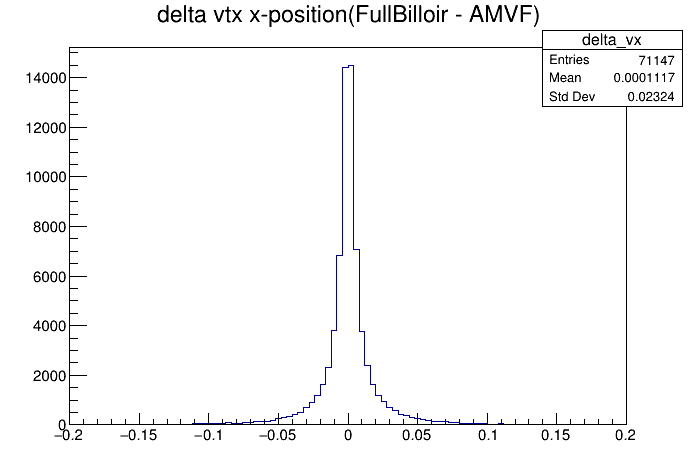

In [6]:
canvas_delta_vx->cd();
delta_vx->Draw();
canvas_delta_vx->Draw();

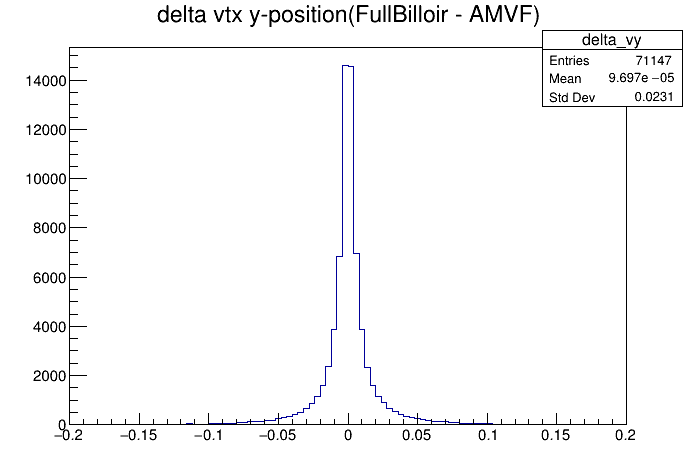

In [7]:
canvas_delta_vy->cd();
delta_vy->Draw();
canvas_delta_vy->Draw();

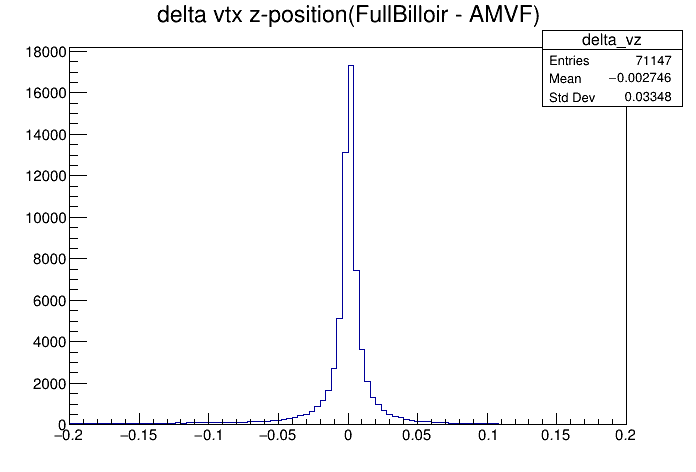

In [8]:
canvas_delta_vz->cd();
delta_vz->Draw();
canvas_delta_vz->Draw();